In [1]:
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)

import numpy as np


SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.xkcd()

In [2]:
planet_3b_rsr = r"D:\RSRs\PlanetScope_RSR_SatID_0f_10.csv"
planet_sd_rsr = r"D:\RSRs\PlanetScope_RSR_SatID_3K_3R_3S.csv"

## Planet 3B

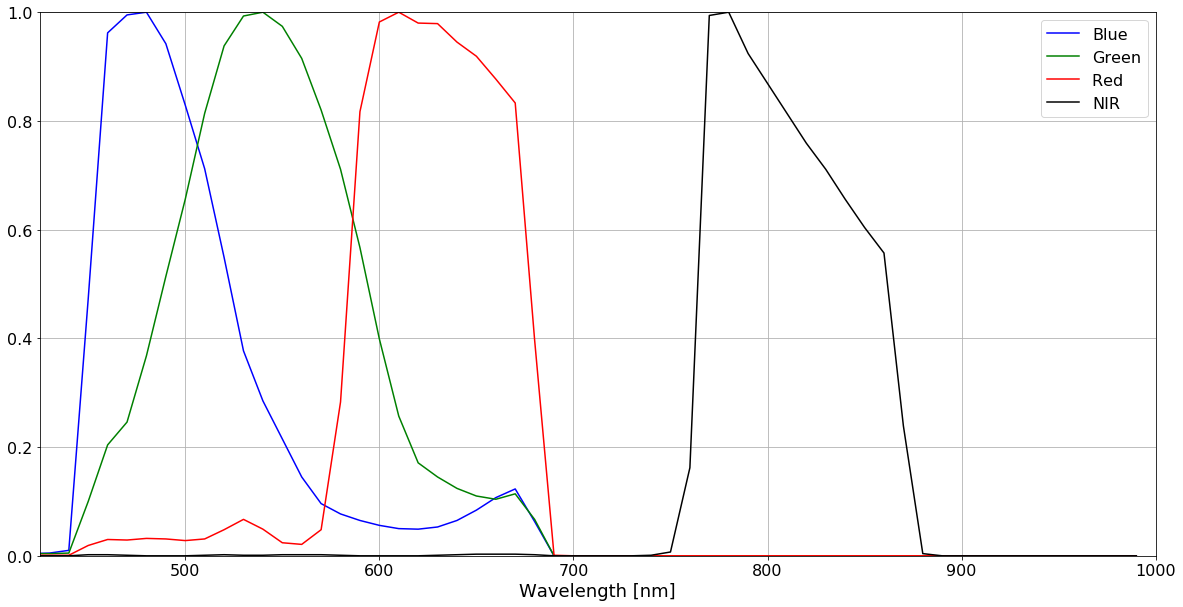

In [3]:
rsr_df = pd.read_csv(planet_3b_rsr)

# wavelength is in um, convert to nm
rsr_df['Wavelength [nm]'] = rsr_df[rsr_df.keys()[0]]*1000

axx = rsr_df.plot(x=rsr_df.keys()[-1], y=rsr_df.keys()[1:5],
           figsize=(20,10),
           grid=True, colors=['blue', 'green', 'red', 'black']);

axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend()

## Planet SD

Index(['Wavelength (nm)', 'Blue', 'Green', 'Red', 'NIR'], dtype='object')


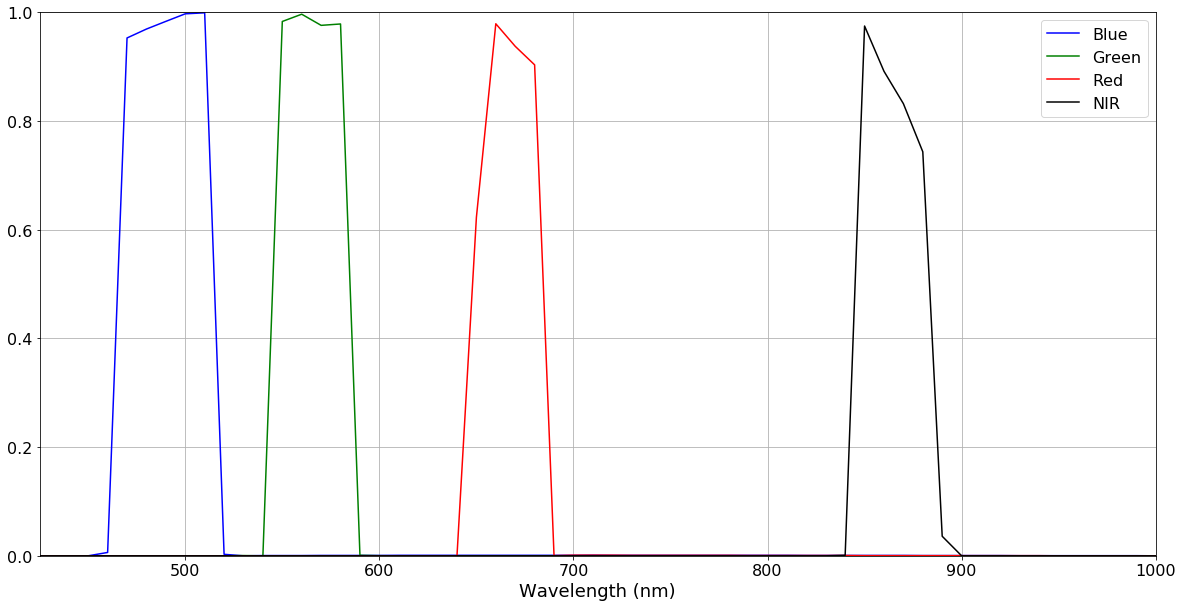

In [4]:
rsr_df = pd.read_csv(planet_sd_rsr)

# rename columns
rsr_df.rename(columns={' Blue response':'Blue',
                ' Green response':'Green',
                ' Red response':'Red',
                ' NIR response': 'NIR'}, 
                 inplace=True)

print(rsr_df.columns)
       
axx = rsr_df.plot(x=rsr_df.keys()[0],
           figsize=(20,10),
           grid=True, colors=['blue', 'green', 'red', 'black']);

axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend();

## Kernel

In [5]:
f490 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F490.xlsx"
f550 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F550.xlsx"
f650 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F650.xlsx"
f725 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F725.xlsx"
f850 = r"D:\projects\RD\UAV\mapir_kernel\transmission_curves\F850.xlsx"

df490 = pd.read_excel(f490, skiprows=1, names=['Wavelength [nm]', 'F490'])
df490['F490'] /= 100

df550 = pd.read_excel(f550, skiprows=2, names=['Wavelength [nm]', 'F550'])
df550['F550'] /= 100

df650 = pd.read_excel(f650, names=['Wavelength [nm]', 'F650'])
df650['F650'] /= 100

df725 = pd.read_excel(f725, names=['Wavelength [nm]', 'F725'])
df725['F725'] /= 100

df850 = pd.read_excel(f850, names=['Wavelength [nm]', 'F850'])
df850['F850'] /= 100

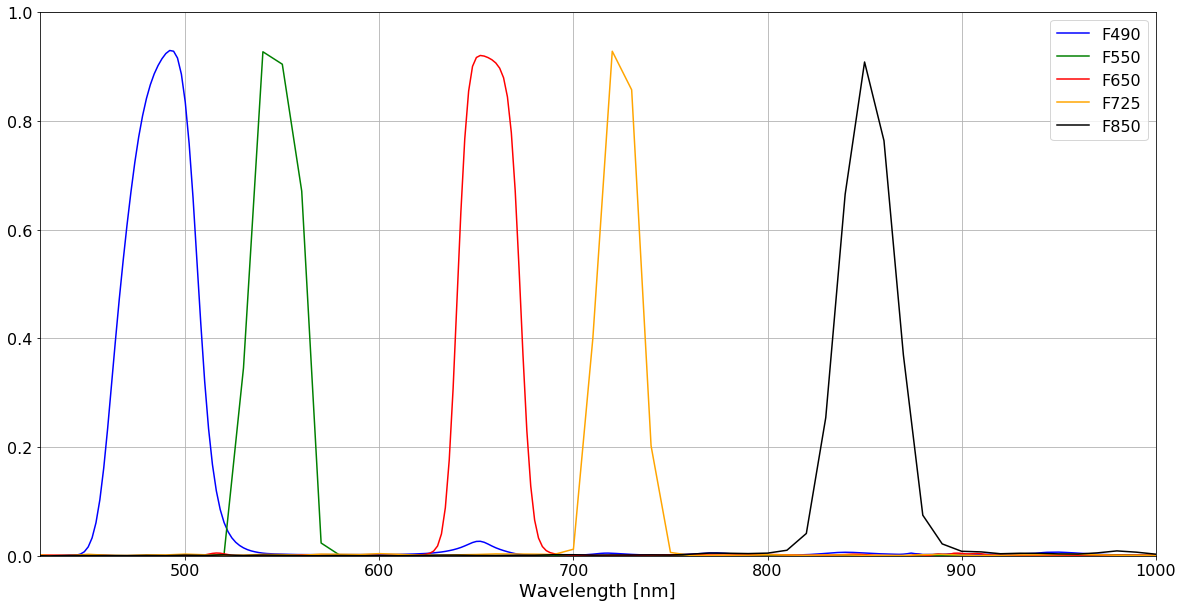

In [6]:
axx = df490.plot(x=df490.keys()[0], figsize=(20,10), color='blue')
axx = df550.plot(ax=axx, x=df550.keys()[0], color='green')
axx = df650.plot(ax=axx, x=df550.keys()[0], color='red')
axx = df725.plot(ax=axx, x=df725.keys()[0], color='orange')
axx = df850.plot(ax=axx, x=df850.keys()[0], color='black')
axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend()


plt.grid(True)
plt.show()

## Landsat 8

In [7]:
l8_rsr_fi = r"D:\projects\RD\UAV\mapir_kernel\Ball_BA_RSR.v1.1-1.xlsx"
df_l8_blue = pd.read_excel(l8_rsr_fi, sheet_name='Blue')
df_l8_green = pd.read_excel(l8_rsr_fi, sheet_name='Green')
df_l8_red = pd.read_excel(l8_rsr_fi, sheet_name='Red')
df_l8_nir = pd.read_excel(l8_rsr_fi, sheet_name='NIR')

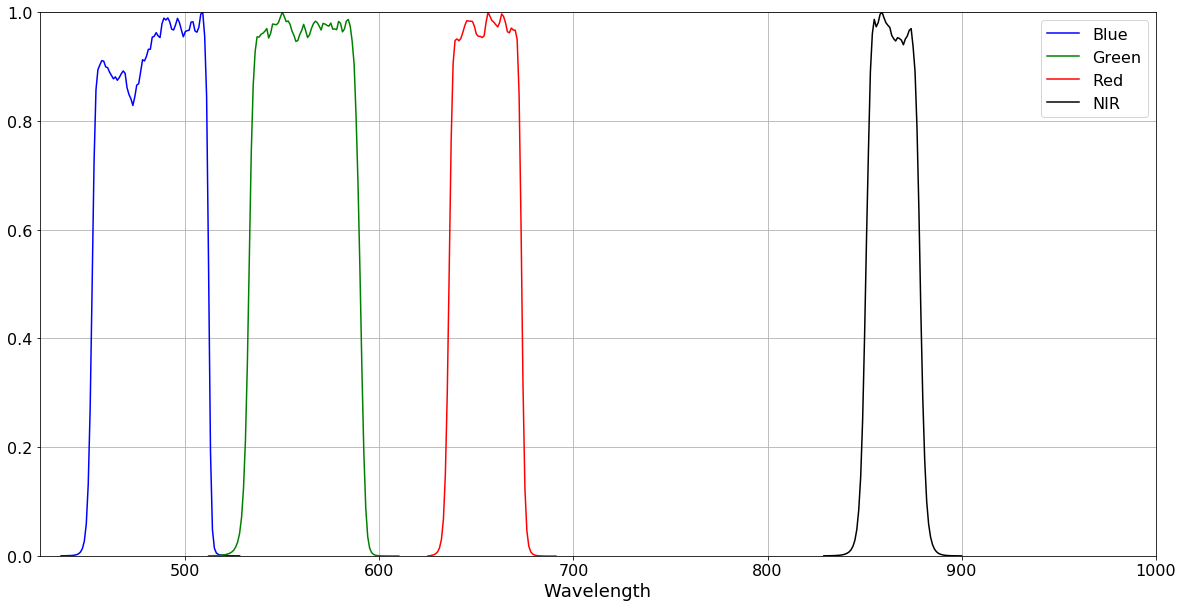

In [8]:
axx = df_l8_blue.plot(x=df_l8_blue.keys()[0], figsize=(20,10), y=df_l8_blue.keys()[1], label='Blue', color='blue')
axx = df_l8_green.plot(ax=axx, x=df_l8_green.keys()[0], y=df_l8_green.keys()[1], label='Green', color='green')
axx = df_l8_red.plot(ax=axx, x=df_l8_red.keys()[0], y=df_l8_red.keys()[1], label='Red', color='red')
axx = df_l8_nir.plot(ax=axx, x=df_l8_nir.keys()[0], y=df_l8_nir.keys()[1], label='NIR', color='black')
axx.set_ylim([0,1])
axx.set_xlim([425,1000])
axx.legend(bbox_to_anchor=(1,1), loc="upper right")
          
plt.grid(True)
plt.show()

## Plot kernel bands on top of Planet and Landsat

### Kernel vs. Landsat

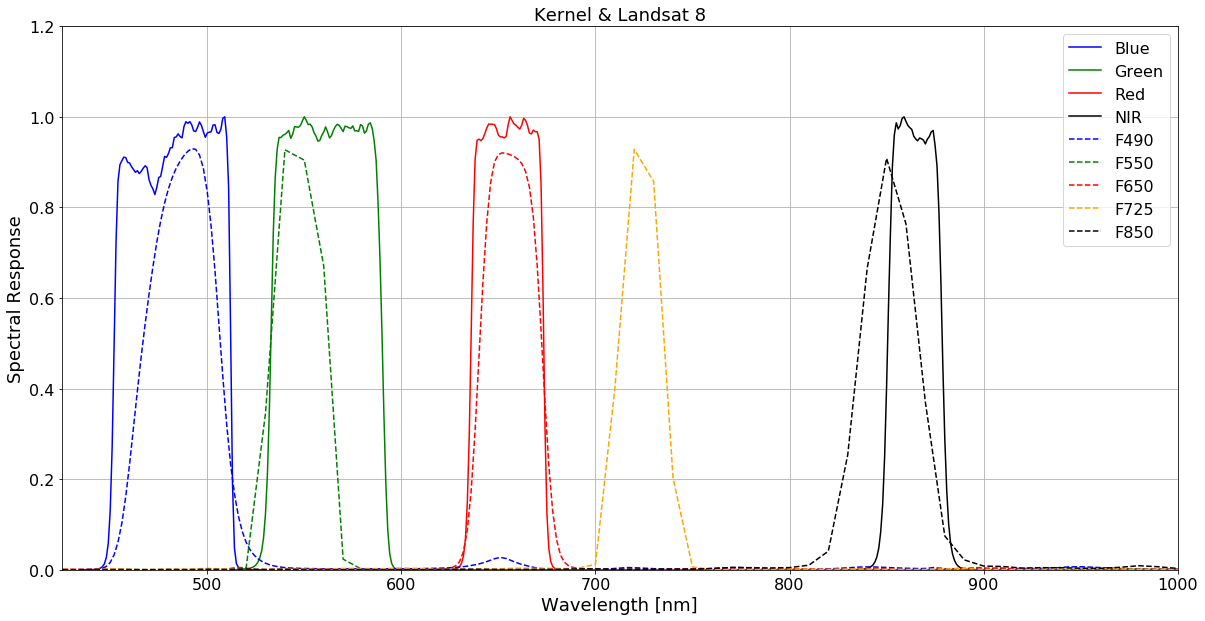

(2.760933424704169, 18.712118584720045, 2.3286076894836127, 8.582516662059644)

In [103]:
axx = df_l8_blue.plot(x=df_l8_blue.keys()[0], figsize=(20,10), y=df_l8_blue.keys()[1], label='Blue', color='blue')
axx = df_l8_green.plot(ax=axx, x=df_l8_green.keys()[0], y=df_l8_green.keys()[1], label='Green', color='green')
axx = df_l8_red.plot(ax=axx, x=df_l8_red.keys()[0], y=df_l8_red.keys()[1], label='Red', color='red')
axx = df_l8_nir.plot(ax=axx, x=df_l8_nir.keys()[0], y=df_l8_nir.keys()[1], label='NIR', color='black')

axx = df490.plot(ax=axx, x=df490.keys()[0], style='--', color='blue')
axx = df550.plot(ax=axx, x=df550.keys()[0], style='--', color='green')
axx = df650.plot(ax=axx, x=df650.keys()[0], style='--', color='red')
axx = df725.plot(ax=axx, x=df725.keys()[0], style='--', color='orange')
axx = df850.plot(ax=axx, x=df850.keys()[0], style='--', color='black')

axx.set_ylim([0,1.2])
axx.set_xlim([425,1000])
axx.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.title('Kernel & Landsat 8')   
plt.grid(True)
plt.ylabel('Spectral Response')
plt.show()

l8_blue_cor = np.trapz(df_l8_blue[df_l8_blue.keys()[1]].values, dx=1) / np.trapz(df490['F490'].values, dx=10)
l8_green_cor = np.trapz(df_l8_green[df_l8_green.keys()[1]].values, dx=1) / np.trapz(df550['F550'].values, dx=10)
l8_red_cor = np.trapz(df_l8_red[df_l8_red.keys()[1]].values, dx=1) / np.trapz(df650['F650'].values, dx=10)
l8_nir_cor = np.trapz(df_l8_nir[df_l8_nir.keys()[1]].values, dx=1) / np.trapz(df850['F850'].values, dx=10)

l8_blue_cor = df_l8_blue[df_l8_blue.keys()[1]].values.sum() / df490['F490'].values.sum()
l8_green_cor = df_l8_green[df_l8_green.keys()[1]].values.sum() / df550['F550'].values.sum()
l8_red_cor = df_l8_red[df_l8_red.keys()[1]].values.sum() / df650['F650'].values.sum()
l8_nir_cor = df_l8_nir[df_l8_nir.keys()[1]].values.sum() / df850['F850'].values.sum()

l8_blue_cor, l8_green_cor, l8_red_cor, l8_nir_cor

### Kernel vs. Planet SD

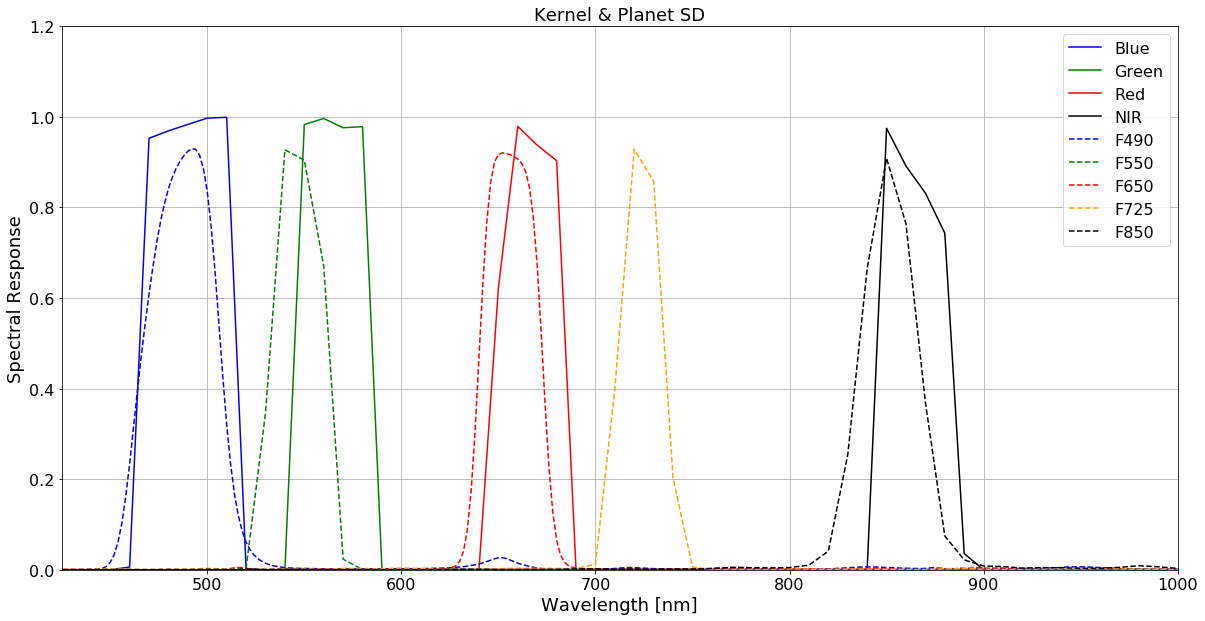

(0.24237416504339543,
 1.312242985960583,
 0.21876434834348216,
 1.0681074925519825)

In [104]:
axx = rsr_df.plot(x=rsr_df.keys()[0],
           figsize=(20,10),
           grid=True, colors=['blue', 'green', 'red', 'black']);


axx = df490.plot(ax=axx, x=df490.keys()[0], style='--', color='blue')
axx = df550.plot(ax=axx, x=df550.keys()[0], style='--', color='green')
axx = df650.plot(ax=axx, x=df650.keys()[0], style='--', color='red')
axx = df725.plot(ax=axx, x=df725.keys()[0], style='--', color='orange')
axx = df850.plot(ax=axx, x=df850.keys()[0], style='--', color='black')

axx.set_ylim([0,1.2])
axx.set_xlim([425,1000])
axx.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.title('Kernel & Planet SD')   
plt.grid(True)
plt.ylabel('Spectral Response')
plt.show()

sd_blue_cor = np.trapz(rsr_df['Blue'].values, dx=10) / np.trapz(df490['F490'].values, dx=10)
sd_green_cor = np.trapz(rsr_df['Green'].values, dx=10) / np.trapz(df550['F550'].values, dx=10)
sd_red_cor = np.trapz(rsr_df['Red'].values, dx=10) / np.trapz(df650['F650'].values, dx=10)
sd_nir_cor = np.trapz(rsr_df['NIR'].values, dx=10) / np.trapz(df850['F850'].values, dx=10)

sd_blue_cor = rsr_df['Blue'].values.sum() / df490['F490'].values.sum()
sd_green_cor = rsr_df['Green'].values.sum() / df550['F550'].values.sum()
sd_red_cor = rsr_df['Red'].values.sum() / df650['F650'].values.sum()
sd_nir_cor = rsr_df['NIR'].values.sum() / df850['F850'].values.sum()

sd_blue_cor, sd_green_cor, sd_red_cor, sd_nir_cor

### Kernel vs. Planet 3b

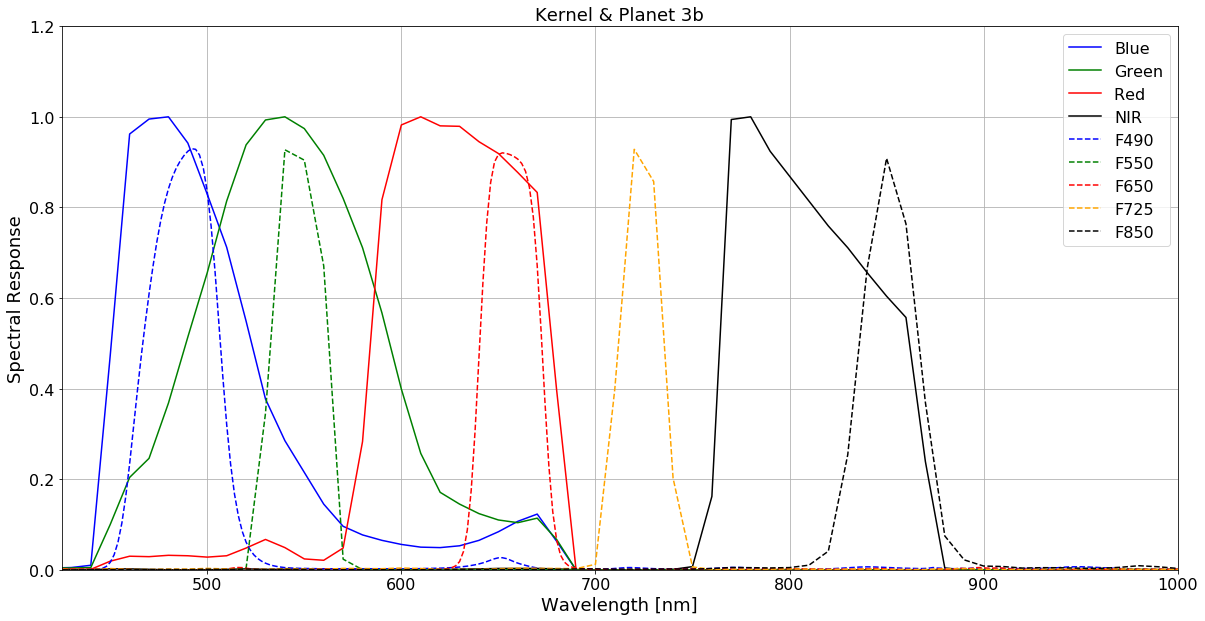

(0.4120026744119311, 3.7789708873845336, 0.5997518704662557, 2.559046653767008)

In [105]:
rsr_df_3b = pd.read_csv(planet_3b_rsr)

# wavelength is in um, convert to nm
rsr_df_3b['Wavelength [nm]'] = rsr_df_3b[rsr_df_3b.keys()[0]]*1000

axx = rsr_df_3b.plot(x=rsr_df_3b.keys()[-1], y=rsr_df_3b.keys()[1:5],
           figsize=(20,10),
           grid=True, colors=['blue', 'green', 'red', 'black']);


axx = df490.plot(ax=axx, x=df490.keys()[0], style='--', color='blue')
axx = df550.plot(ax=axx, x=df550.keys()[0], style='--', color='green')
axx = df650.plot(ax=axx, x=df650.keys()[0], style='--', color='red')
axx = df725.plot(ax=axx, x=df725.keys()[0], style='--', color='orange')
axx = df850.plot(ax=axx, x=df850.keys()[0], style='--', color='black')

axx.set_ylim([0,1.2])
axx.set_xlim([425,1000])
axx.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.title('Kernel & Planet 3b')          
plt.grid(True)
plt.ylabel('Spectral Response')
plt.show()

tb_blue_cor = np.trapz(rsr_df_3b['Blue'].values, dx=10) / np.trapz(df490['F490'].values, dx=10)
tb_green_cor = np.trapz(rsr_df_3b['Green'].values, dx=10) / np.trapz(df550['F550'].values, dx=10)
tb_red_cor = np.trapz(rsr_df_3b['Red '].values, dx=10) / np.trapz(df650['F650'].values, dx=10)
tb_nir_cor = np.trapz(rsr_df_3b['NIR'].values, dx=10) / np.trapz(df850['F850'].values, dx=10)

tb_blue_cor = rsr_df_3b['Blue'].values.sum() / df490['F490'].values.sum()
tb_green_cor = rsr_df_3b['Green'].values.sum() / df550['F550'].values.sum()
tb_red_cor = rsr_df_3b['Red '].values.sum() / df650['F650'].values.sum()
tb_nir_cor = rsr_df_3b['NIR'].values.sum() / df850['F850'].values.sum()

tb_blue_cor, tb_green_cor, tb_red_cor, tb_nir_cor

In [99]:
# solve least squares equation
from scipy.linalg import lstsq
from scipy.signal import resample as sig_resample

b = rsr_df_3b['Blue'].values[np.newaxis,...]
a = df490['F490'].values[np.newaxis,...]

a = sig_resample(b, a.shape[0])
a = np.vstack([np.ones((1,a.shape[1])), a])

# expects column vectors
x, residues, rank, s = lstsq(a.T, b.T)

In [100]:
x, residues, rank, s

(array([[-8.59975057e-17],
        [ 1.00000000e+00]]),
 array([1.88029271e-31]),
 2,
 array([7.8277458 , 2.14740885]))

In [83]:
rsr_df_3b.shape, df490.shape

((60, 6), (355, 2))

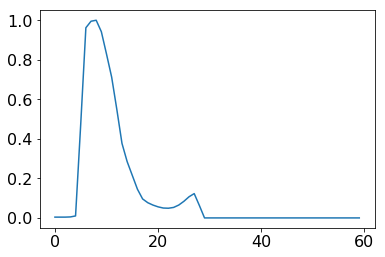

In [101]:
plt.plot(a[1,:])